## Problem Statement

### Business Context



Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective



In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.



### Data Description



The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas scikit-learn matplotlib seaborn xgboost -q --user

In [ ]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    make_scorer
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Write your code here to read the data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/EasyVisa.csv')

# copying data to another variable to avoid any changes to original data
df = data.copy()

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data.

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df.head() #first 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
df.tail() #last 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


**Observations**

1. **case_id** – Unique identifier for each record with no duplicates.

2. **continent** – Dominated by Asia, indicating a skewed applicant origin.

3. **education_of_employee** – Bachelor's is the most common education level.

4. **has_job_experience** – Majority of applicants have prior work experience.

5. **requires_job_training** – Most roles don’t require additional job training.

6. **no_of_employees** – Contains outliers and a few invalid negative values.

7. **yr_of_estab** – Some very old establishment years like 1800 seem incorrect.

8. **region_of_employment** – Northeast is the most frequent job location.

9. **prevailing_wage** – Wage values are highly varied with notable outliers.

10. **unit_of_wage** – 'Year' is the predominant wage unit across entries.

11. **full_time_position** – Most positions are full-time roles.

12. **case_status** – Target variable is imbalanced, with ~67% Certified cases.

#### Understand the shape of the dataset

In [ ]:
df.shape

(25480, 12)

**Observations**

The dataset has 25,480 rows and 12 columns. ​

#### Check the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**

1. **No Missing Values** – All 25,480 entries are complete across all 12 columns.

2. **Data Types** –

  *   **object**: 9 columns (mostly categorical like continent, case_status)
  *   **int64**: 2 columns (no_of_employees, yr_of_estab)
  * **float64**: 1 column (prevailing_wage)

3. **Memory Usage** – Total memory footprint is ~2.3 MB, indicating it's a manageable dataset.

4. **ID Column** – case_id is an object type but can be treated as a unique identifier.

5. **Target Variable** – case_status is categorical and suitable for classification tasks.

In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

**Observations**

There are 0 duplicate rows in the dataset — each entry is unique.

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

case_id                 0.000
continent               0.000
education_of_employee   0.000
has_job_experience      0.000
requires_job_training   0.000
no_of_employees         0.000
yr_of_estab             0.000
region_of_employment    0.000
prevailing_wage         0.000
unit_of_wage            0.000
full_time_position      0.000
case_status             0.000
dtype: float64

**Observations**

All columns in the dataset are complete — there are no missing or null values in any of the 25,480 records.

In [ ]:
#Dropping case_id column because its unique for each entry
df.drop(["case_id"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

#### Statistical summary of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


**Observations**

1. **no_of_employees** – Contains extreme outliers and an invalid negative value (-26).

2. **yr_of_estab** – Includes outdated years like 1800, likely data entry errors.

3. **prevailing_wage** – Wide wage range with potential outliers at both ends.



#### Fixing the negative values in number of employees columns

In [ ]:
df.loc[df["no_of_employees"] < 0].shape #checking shape of dataframe with only negative values

(33, 11)

There are 33 negative values in the table. All of these will be corrected by taking absolute values.

In [ ]:
# taking the absolute values for number of employees
df["no_of_employees"] = abs(df["no_of_employees"])

In [ ]:
df.describe().T #confirming changes

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.089,22877.917,11.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


Now there are no negative values in the dataframe.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)#using only object data types

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

**Observations**

1. **case_id** – All 25,480 entries are unique, confirming it's a proper identifier.

2. **prevailing_wage** – Nearly every record has a unique wage (25,454), suggesting fine-grained salary data.

3. **no_of_employees** – 7,105 unique values indicate a wide diversity in company sizes.

4. **yr_of_estab** – 199 unique establishment years show varied company ages.

5. **continent** – Only 6 continents represented, possibly missing one.

6. **region_of_employment** – 5 employment regions are present (e.g., Midwest, Northeast).

7. **education_of_employee** – 4 education levels observed.

8. **unit_of_wage** – Wages are represented in 4 units (e.g., Year, Hour).

9. **has_job_experience**, **requires_job_training**, **full_time_position**, **case_status** – All binary fields with just 2 unique values each, making them ideal for classification modeling.

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=10):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### 1. Observations on continent

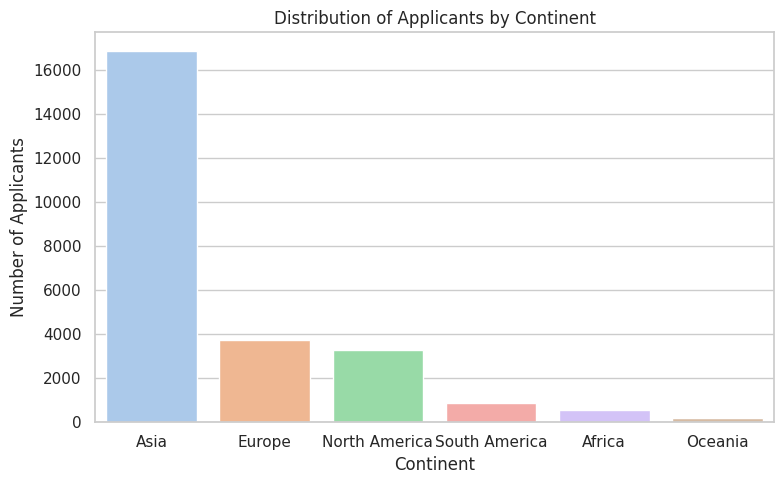

In [ ]:
# Univariate analysis: region_of_employment
continent_counts = df['continent'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=continent_counts.index, y=continent_counts.values,palette= "pastel")
plt.title('Distribution of Applicants by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

**Observations**

1. Asia overwhelmingly dominates the applicant pool with over 66% of total cases.

2. Europe and North America contribute a moderate share, jointly forming ~27.5%.

3. South America, Africa, and Oceania represent minority segments, accounting for less than 7% combined.

4. This distribution highlights Asia as a key region for visa applications, potentially due to high-tech workforce migration.

5. The variable may influence case status due to region-specific policies or labor market dynamics.

#### 2. Observations on education of employee

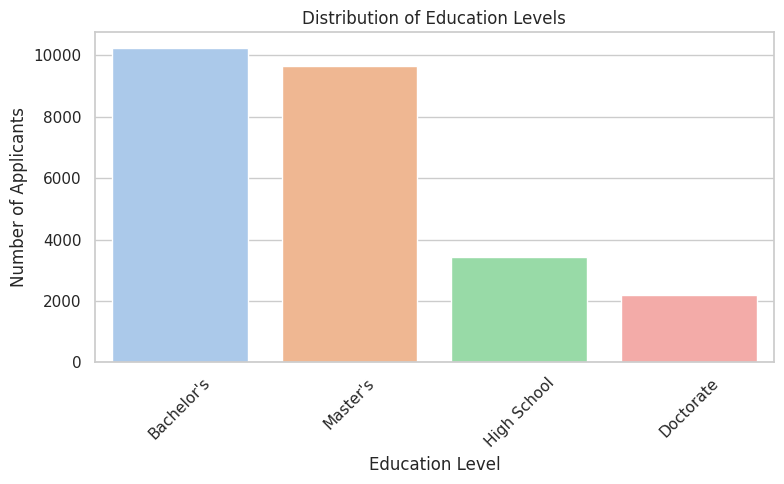

In [ ]:
# Univariate analysis: education_of_employee
education_counts = df['education_of_employee'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=education_counts.index, y=education_counts.values,palette= "pastel")
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

1. Bachelor’s degree is the most common education level, accounting for 40% of the applicants.

2. Master’s degree holders are close behind, suggesting a highly educated applicant pool.

3. Only 13% of applicants have a high school education, indicating limited low-skilled entries.

4. Doctorate holders make up the smallest group, but still represent a significant specialized skill segment.

5. The education level distribution is skewed toward graduate-level qualifications, implying that visa applications are dominated by skilled professionals.

#### 3. Observations on job experience

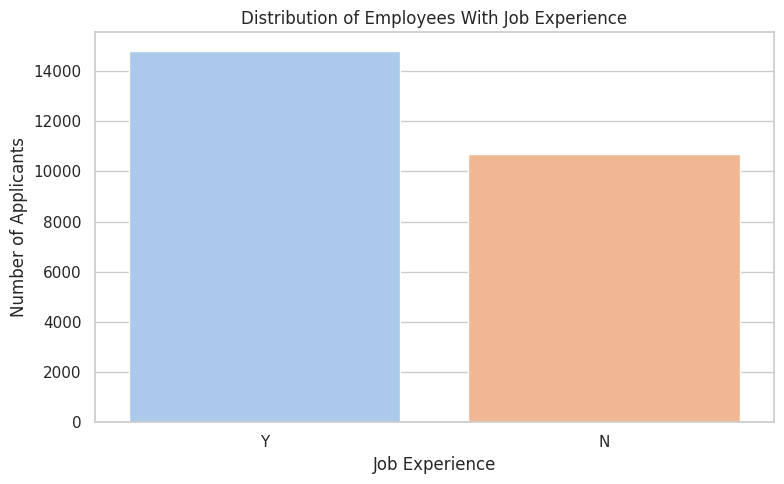

In [ ]:
# Univariate analysis: region_of_employment
experience_counts = df['has_job_experience'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=experience_counts.index, y=experience_counts.values,palette= "pastel")
plt.title('Distribution of Employees With Job Experience')
plt.xlabel('Job Experience')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

**Observations**

1. Majority of applicants have prior job experience, suggesting a skilled and seasoned applicant pool.

2. A significant portion still lack job experience, possibly fresh graduates or entry-level candidates.

3. This distribution indicates the visa program caters to both experienced professionals and emerging talent.

4. The variable could play a crucial role in predicting visa approval, as experience often aligns with employer requirements.

#### 4. Observations on on job training

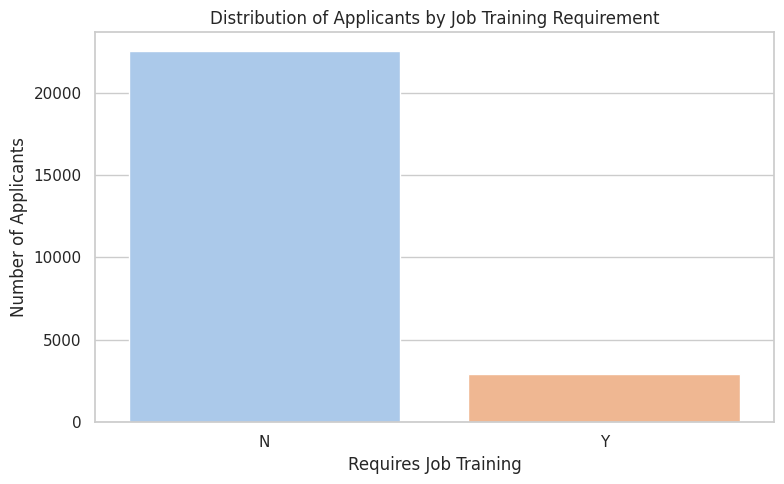

In [ ]:
# Univariate analysis: region_of_employment
training_counts = df['requires_job_training'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=training_counts.index, y=training_counts.values,palette= "pastel")
plt.title('Distribution of Applicants by Job Training Requirement')
plt.xlabel('Requires Job Training')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

**Observations**

1. Most applicants do not require job training, indicating they already meet role-specific skill needs.

2. Only a small portion (12%) need training, which may represent junior or less experienced candidates.

3. The skew suggests that employers prefer applicants ready to contribute immediately.

4. This variable might be inversely related to visa approval rates, depending on how training needs affect application credibility.

#### 5. Observations on number of employees

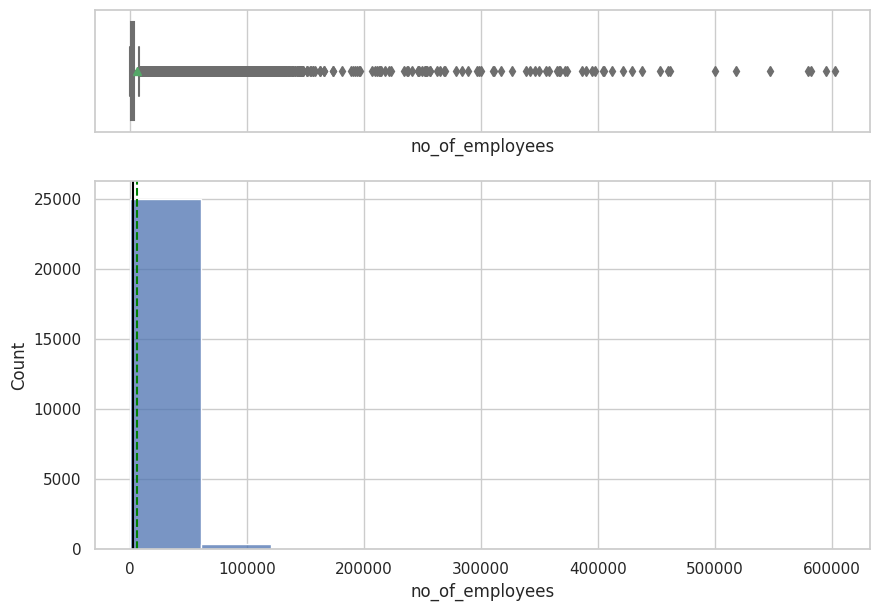

In [ ]:
# Observations on Customer_age
histogram_boxplot(df, "no_of_employees")

**Observations**

1. The distribution is highly right-skewed due to a few extremely large companies with hundreds of thousands of employees.

2. Most companies are relatively small to mid-sized, with 75% having fewer than ~3,500 employees.

3. The mean is much higher than the median, confirming the presence of outliers.

4. After correction, all values are positive, but log-scaling or outlier treatment may be necessary for modeling.

5. This feature may reflect the employer’s capacity and credibility, possibly influencing visa approval odds.

#### 6. Observations on year of establishment

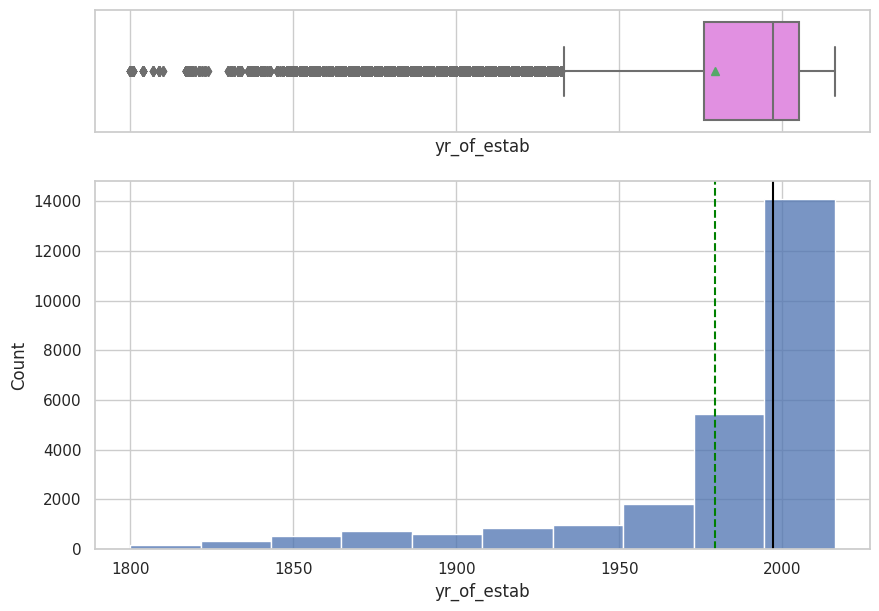

In [ ]:

histogram_boxplot(df, "yr_of_estab")

**Observations**

1. Most companies were established after the mid-1970s, indicating a relatively modern workforce.

2. A value of 1800 appears unrealistic, likely a data anomaly that should be treated or removed.

3. The distribution is slightly left-skewed, with more recent establishments being more common.

4. Median (1997) suggests half of the companies are ~30 years old or newer.

5. This variable may help model employer stability or maturity as a proxy for credibility.



#### 7. Observations on region of employment

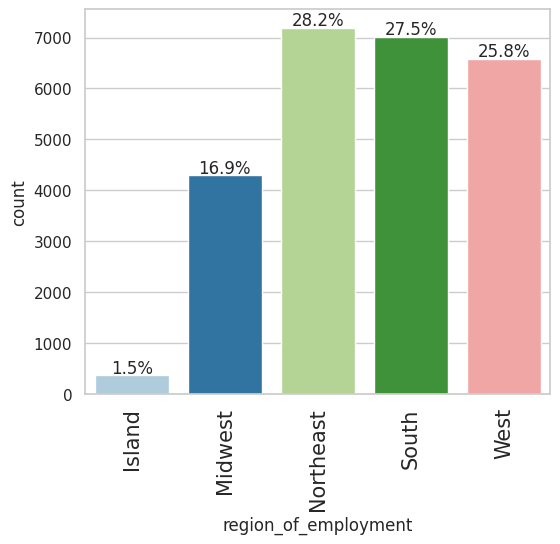

In [ ]:
labeled_barplot(df, "region_of_employment", perc=True)

**Observations**

1. Northeast is the most common employment region, accounting for 28% of cases, closely followed by the South and West.

2. Island region has the lowest representation with only 1.5% of the applicants.

3. The applicant distribution is fairly balanced across Northeast, South, and West, indicating broad demand across major U.S. regions.

4. The Midwest has moderate representation, while the Island region may reflect U.S. territories like Puerto Rico or Hawaii.

5. This regional distribution can help in resource allocation or marketing strategies based on location-specific visa demand.

#### 8. Observations on prevailing wage

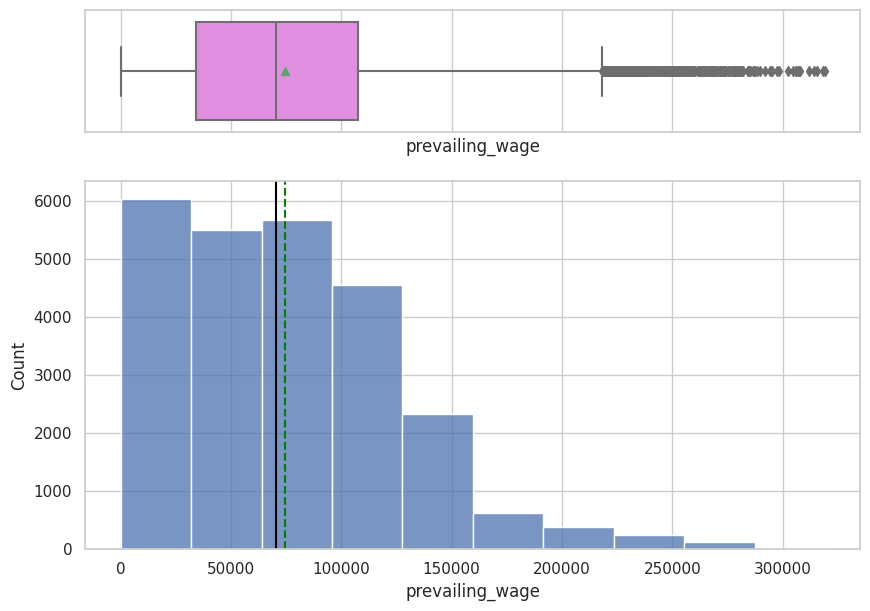

In [ ]:
# Observations on prevailing_wage
histogram_boxplot(df, "prevailing_wage")

**Observations**

1. The distribution is right-skewed with a long tail, as shown in both histogram and box plot.

2. Outliers are clearly present, especially with wages exceeding    $200K
     and values below $10.

3. The mean is higher than the median, suggesting a few high-wage cases are inflating the average.

4. The min value (~$2.14) is likely invalid or due to incorrect unit conversion.

4. Wage data may benefit from log transformation or outlier capping for better model performance.

#### 9. Observations on unit of wage

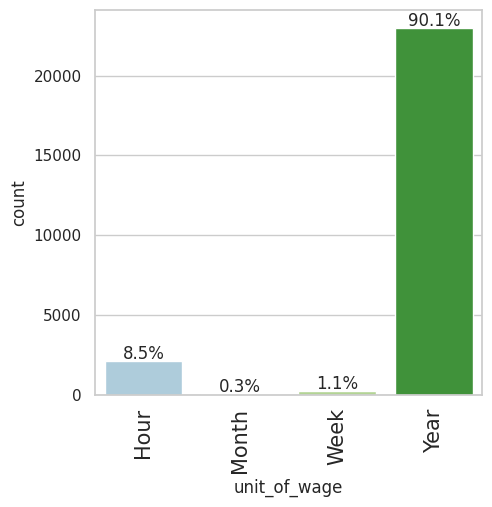

In [ ]:
labeled_barplot(df, "unit_of_wage", perc=True)

**Observations**

1. The overwhelming majority of applicants report wages on a yearly basis (90%).

2. A small fraction uses hourly units, while weekly and monthly are rare.

3. The presence of multiple units implies the need for wage normalization (e.g., converting all to yearly wage).

4. This feature is crucial for salary-based modeling, and should be standardized before any comparisons or predictions.

#### 10. Observations on full_time_position

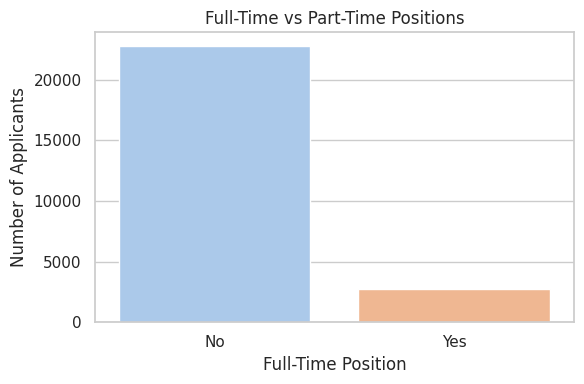

In [ ]:
# Univariate analysis: full_time_position
full_time_counts = df['full_time_position'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=full_time_counts.index, y=full_time_counts.values,palette="pastel")
plt.title('Full-Time vs Part-Time Positions')
plt.xlabel('Full-Time Position')
plt.ylabel('Number of Applicants')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()



**Observations**

1. Nearly 90% of applicants are for full-time positions, showing a strong employer preference for long-term roles.

2. Part-time roles make up just 11%, likely limited to internships or specialized arrangements.

3. Full-time status could positively correlate with higher wages and greater visa approval odds.

4. This variable is highly imbalanced, and important to consider in modeling employment characteristics.

#### 11. Observations on case status

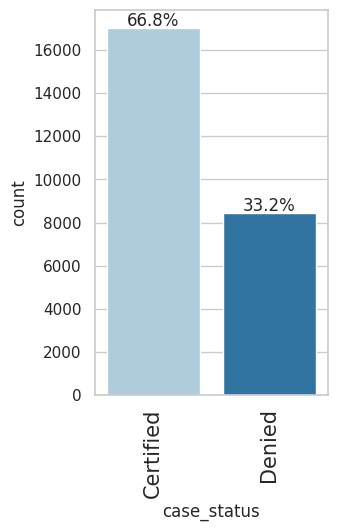

In [ ]:
labeled_barplot(df, "case_status", perc=True)

**Observations**

1. Two-thirds of all visa applications are approved, reflecting a relatively high certification rate.

2. One-third are denied, indicating there are substantial rejections, likely due to missing qualifications, wage issues, or employer credibility.

3. The variable is moderately imbalanced, which should be considered during model training (e.g., via stratified sampling or class weighting).

4. Since this is the target variable, understanding its relationship with features like experience, wage, education, etc., will be critical for prediction.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=['green', 'orange'])
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

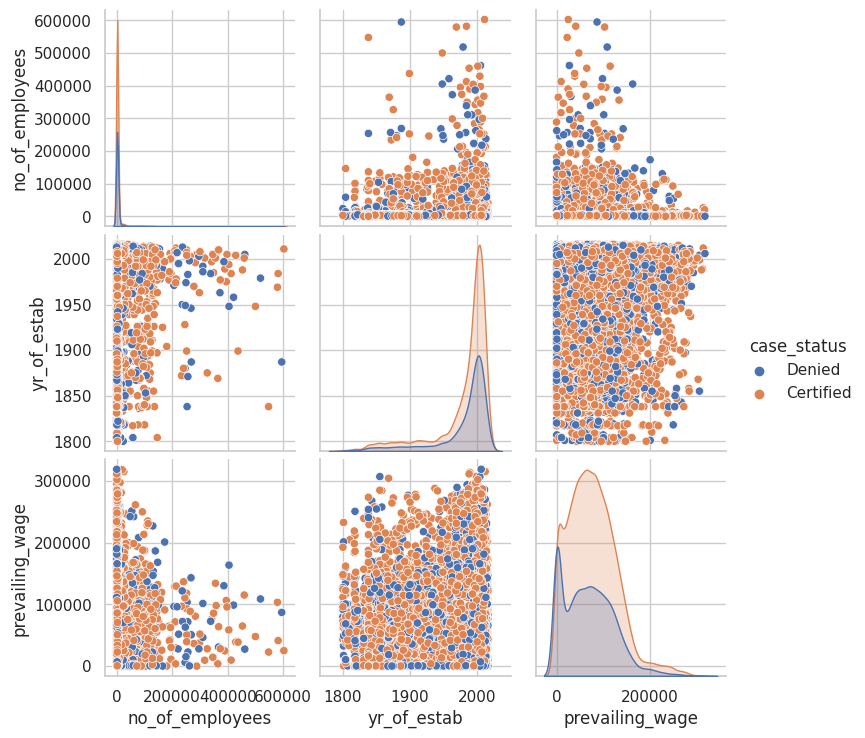

In [ ]:
sns.pairplot(df, hue="case_status")

**Observations**

1. **Prevailing Wage vs Number of Employees**
* Certified cases cluster around higher wages and larger employee counts, showing a positive association between company size, wage offer, and approval.

* Denied cases are more concentrated at lower wages and smaller companies.

2. **Year of Establishment vs Number of Employees**
* Older companies tend to have more employees, especially for certified cases.

* Recently established firms have fewer employees and more denials, indicating organizational maturity is a factor in visa approval.

3. **Year of Establishment vs Prevailing Wage**
* Older companies offer wages across a wider range, with certifications spread across the spectrum.

* Denied cases are more tightly grouped in lower wage bands and among newer establishments.

#### 1. Education Of Employee Vs Case Status

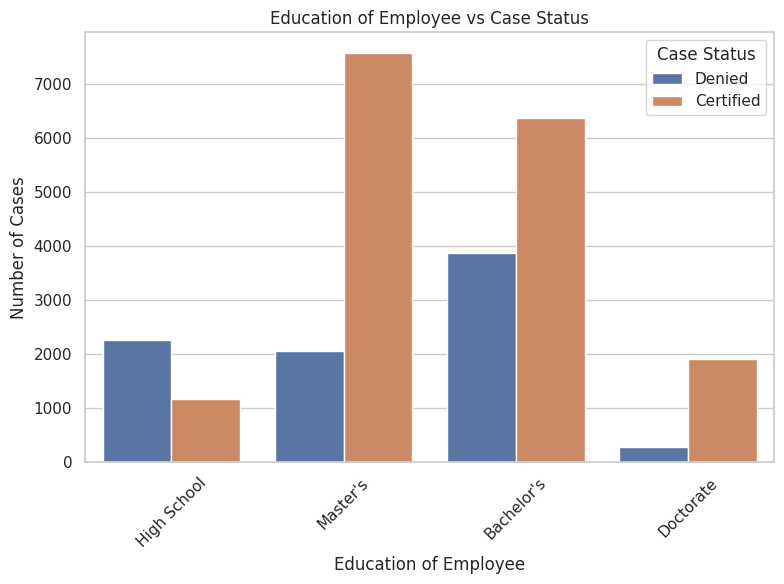

In [ ]:
# Create a count plot for Education of Employee vs Case Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='education_of_employee', hue='case_status')
plt.title('Education of Employee vs Case Status')
plt.xlabel('Education of Employee')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


**Observations**

1. Master’s degree holders have the highest number of cases, and the majority are Certified.

2. Bachelor’s degree holders also have a large volume, but a notable number of these are Denied.

3. Those with High School or Doctorate education see fewer cases overall, but Doctorates have a high certification rate.

4. Other education levels (like undefined or non-standard entries) have relatively low case numbers and a mixed outcome.

#### 2. Continent Vs Case Status

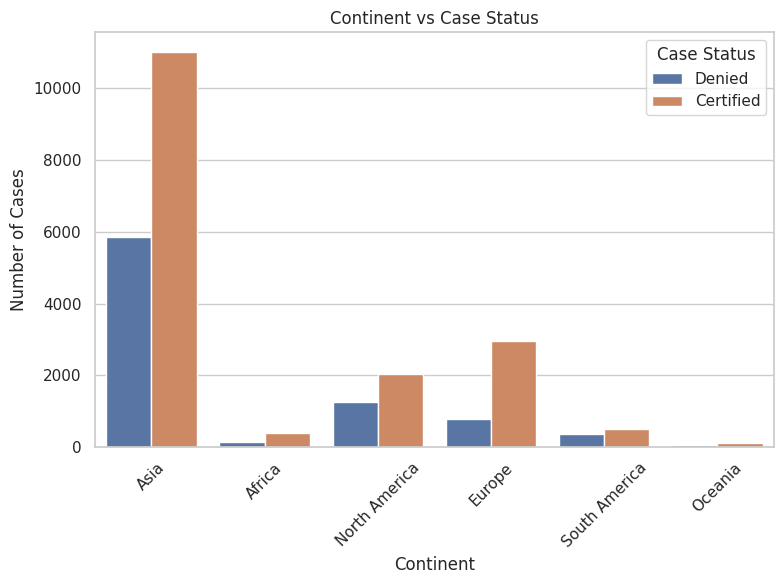

In [ ]:
# Set the visual style
sns.set(style="whitegrid")

# Create a count plot for Continent vs Case Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='continent', hue='case_status')
plt.title('Continent vs Case Status')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


**Observations**

1. Asia has the highest number of cases, with a noticeably higher count of denied cases compared to certified.

2. North America and Europe show a relatively balanced or slightly favorable certification rate.

3. Africa and South America have fewer cases overall but a higher proportion of certified applications compared to denied ones.

4. Oceania shows very few cases with both outcomes.

#### 3. Has Job Experience Vs Case Status

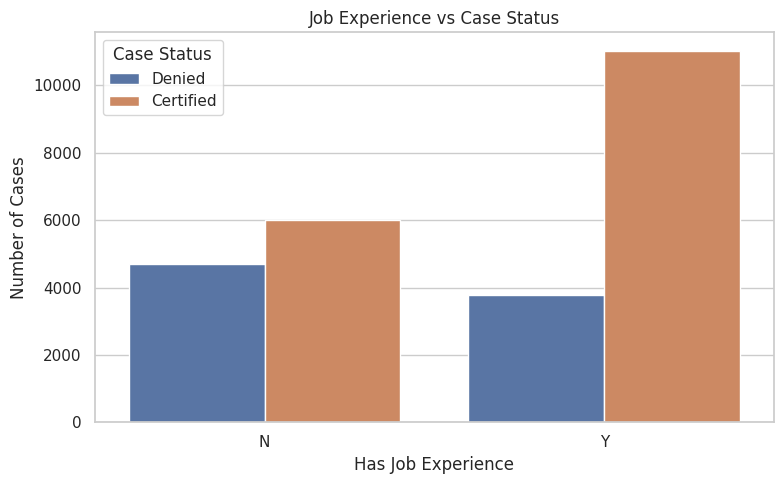

In [ ]:
# Create a count plot for Has Job Experience vs Case Status
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='has_job_experience', hue='case_status')
plt.title('Job Experience vs Case Status')
plt.xlabel('Has Job Experience')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


**Observations**

1. Applicants with job experience (Y) are more likely to be certified. There is a significant difference in certification count compared to denials.

2. Those without experience (N) have a higher denial rate, and their certification count is considerably lower.

#### 4. Requires Job Training vs Case status

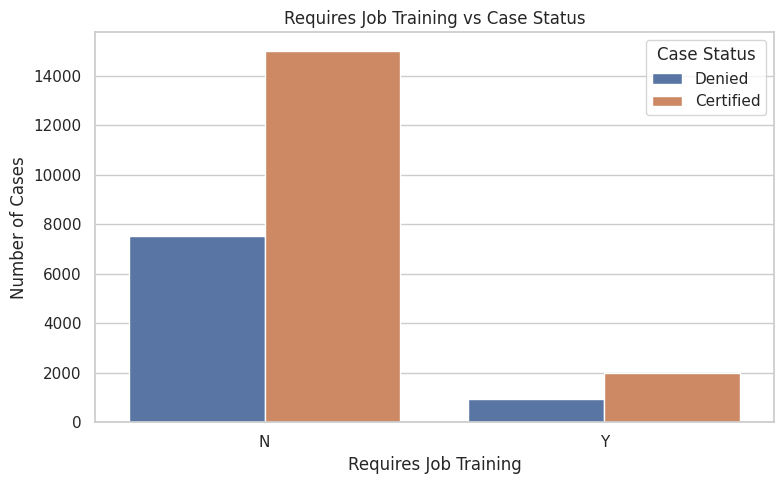

In [ ]:
# Create a count plot for Requires Job Training vs Case Status
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='requires_job_training', hue='case_status')
plt.title('Requires Job Training vs Case Status')
plt.xlabel('Requires Job Training')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

**Observations**

1. Applicants who do not require job training (N) have a significantly higher number of certifications.

2. Those who require job training (Y) face a higher denial rate, and their certification numbers are relatively low.

This indicates that not requiring job training improves the likelihood of visa approval, possibly because it signals the applicant is job-ready and needs minimal employer investment.

#### 5. Region of Employment Vs Case Status

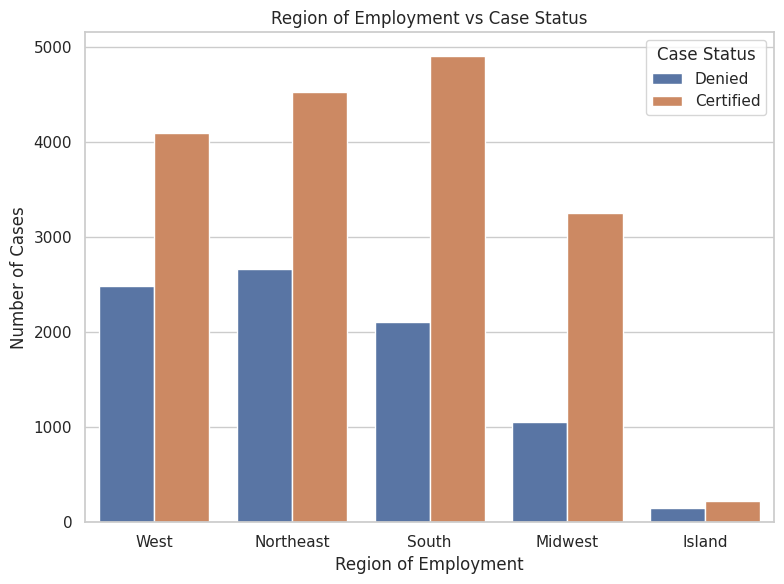

In [ ]:
# Create a count plot for Region of Employment vs Case Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region_of_employment', hue='case_status')
plt.title('Region of Employment vs Case Status')
plt.xlabel('Region of Employment')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

**Observations**

1. The West region has the highest number of cases, but also a notable count of denials, making it relatively competitive.

2. Northeast and Midwest regions have a higher proportion of certified cases, indicating possibly favorable approval trends.

3. The South region has moderate case volume, with certification slightly exceeding denials.

4. Regional differences in employer credibility, industry presence, or processing trends might influence visa outcomes.

#### 6. Full-Time Positions Vs Case Status

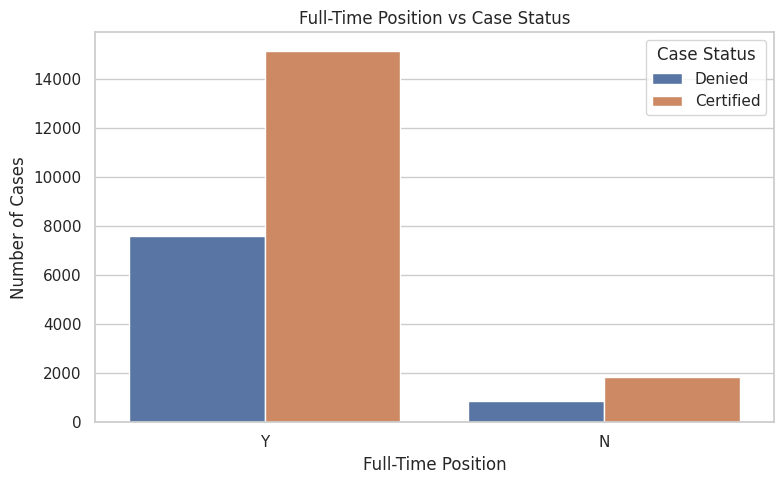

In [ ]:
# Create a count plot for Full-Time Position vs Case Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='full_time_position', hue='case_status')
plt.title('Full-Time Position vs Case Status')
plt.xlabel('Full-Time Position')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


**Observations**

1. A clear majority of Certified cases are associated with full-time positions (Y).

2. Part-time positions (N) show a higher denial rate and significantly fewer certifications.

3. Full-time roles strongly correlate with visa approval, likely due to their stability, income assurance, and alignment with visa policy priorities.

#### 7. Unit Of Wage Vs Case Status

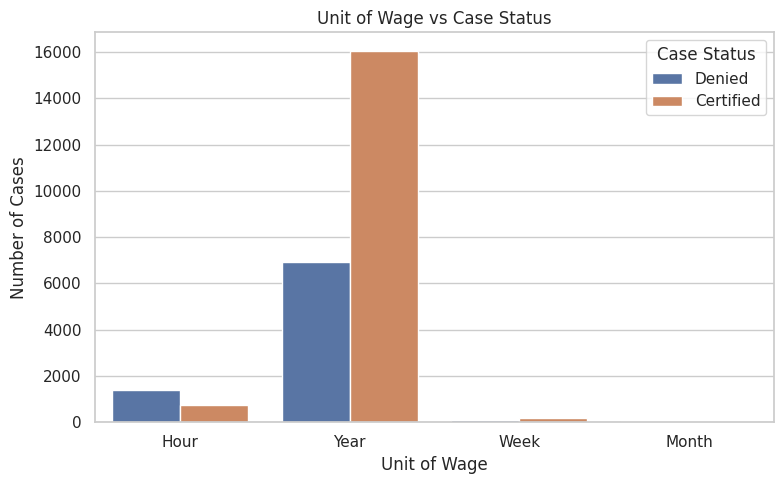

In [ ]:
# Create a count plot for Unit of Wage vs Case Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='unit_of_wage', hue='case_status')
plt.title('Unit of Wage vs Case Status')
plt.xlabel('Unit of Wage')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


**Observations**

1. Yearly wage units dominate the dataset and are associated with a higher number of Certified cases.

2. Hourly wage cases have a relatively higher proportion of denials, suggesting potential concerns about job type or compensation adequacy.

3. Weekly and Monthly wage categories are much smaller in volume but tend to show a balanced or favorable certification rate.

4. Jobs offering annual salaries are more likely to be certified, possibly because they imply full-time, skilled, and stable roles

#### 8. Prevailing Wage Vs Case Status

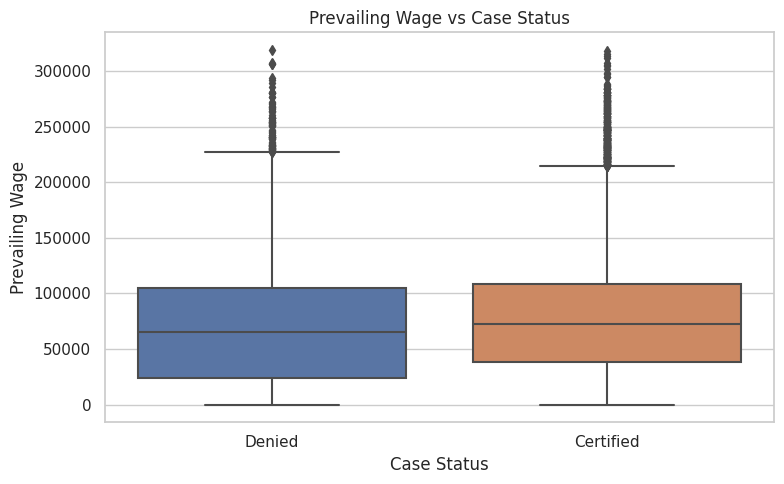

In [ ]:
# Create a box plot for Prevailing Wage vs Case Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='case_status', y='prevailing_wage')
plt.title('Prevailing Wage vs Case Status')
plt.xlabel('Case Status')
plt.ylabel('Prevailing Wage')
plt.tight_layout()
plt.show()


**Observations**

The box plot shows how prevailing wage correlates with case status:

1. Certified cases generally offer a higher median wage compared to denied cases.

2. The interquartile range (IQR) for certified cases is also wider, indicating more variability — some very high wages are clearly visible as outliers.

3. Denied applications tend to cluster around lower wage offers, suggesting that higher wage offers increase the likelihood of approval.

4. Offering competitive wages may positively influence visa approval, possibly because it signals higher skill level or job importance.

#### 9. Year of Eastablishment vs Case Status

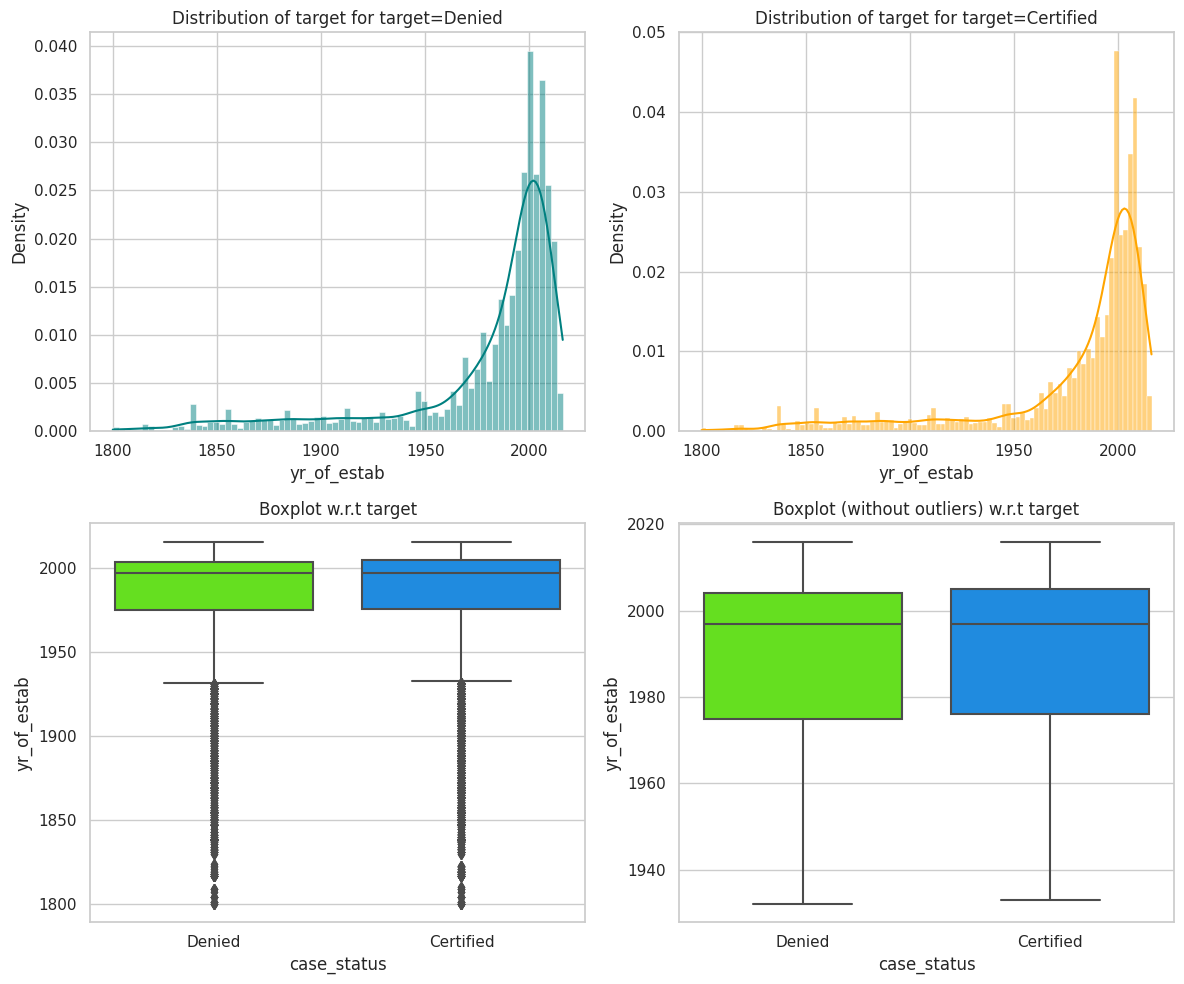

In [ ]:
distribution_plot_wrt_target(df,'yr_of_estab','case_status' )

**Observations**

1. Certified cases are generally associated with older companies — higher median year of establishment (i.e., founded earlier).

2. Denied cases have a slightly lower median year, suggesting those companies might be newer or less established.

3. There's some overlap, but older organizations seem to enjoy more favorable outcomes.

4. This suggests that company maturity may play a role in visa decision-making, likely due to perceived stability and credibility.

#### 10. **Heatmap**


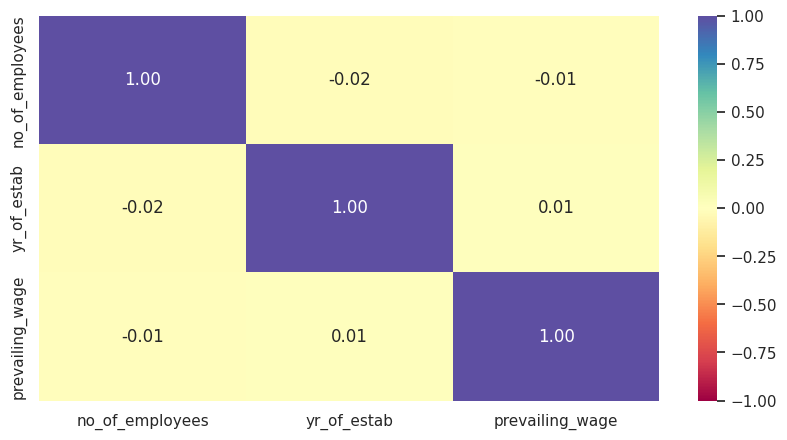

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

* It seems that there is little to no correlation between the numerical variables in the dataset.

## Data Pre-processing

### Outlier Check

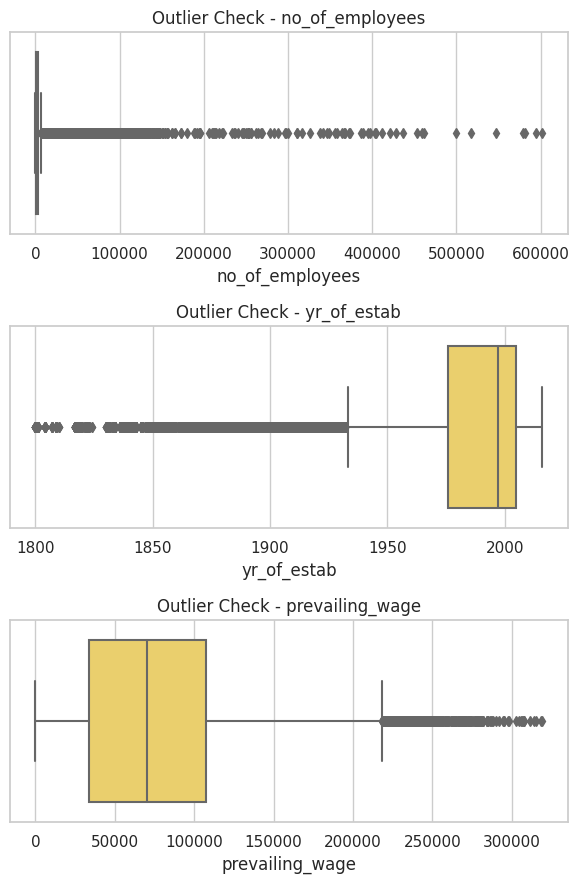

In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a boxplot for each numeric column to check for outliers
plt.figure(figsize=(6, len(numeric_cols) * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color="#FFDB58")
    plt.title(f'Outlier Check - {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


**Observations**

1. **no_of_employees**: Shows many outliers on the higher end. Typical values are tightly packed, with a few large organizations skewing the distribution.

2. **yr_of_estab**: Slight spread but very few outliers. Most companies were established after the 1900s; a few may appear earlier and need validation.

3. **prevailing_wage**: Significant number of high-end outliers. Common values are clustered on the lower end, but a long tail stretches toward extremely high wages.

### Data Preparation for modeling

In [ ]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0) #converting case status values into binary values

X = df.drop(["case_status"], axis=1) # preparing independent variables
y = df["case_status"]# preparing target variable


In [ ]:
X = pd.get_dummies(X, drop_first=True) # using one-hot encoding to encode categorical features

In [ ]:
# Splitting data into training and validation set:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

#Test data
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.1,random_state=1,stratify=y_val
)

In [ ]:
print("Number of rows in train data =", X_train.shape[0]) #Training set is used to train the model in the first place.
print("Number of rows in validation data =", X_val.shape[0]) #Validation set is used for fine-tuning model parameters
print("Number of rows in test data =", X_test.shape[0]) #Test set is used for evaluating the final model performance on unseen data.

Number of rows in train data = 17836
Number of rows in validation data = 6879
Number of rows in test data = 765


## Model Building

### Model Evaluation Criterion

1. **Nature of the Problem:** **High Risk of False Negatives**

  In classification problems, there are two critical types of misclassification:

  **False Positive (FP)**: The model wrongly certifies an unqualified applicant.

  **False Negative (FN)**: The model wrongly denies a qualified applicant.

  **For EasyVisa:** False Negatives are more critical. A false negative means a genuine, eligible candidate is unjustly denied a visa — which can have significant personal, professional, and diplomatic implications.

  In contrast, a false positive (while still undesirable) may later be caught in downstream manual checks or audits.

  Thus, the business and ethical cost of false negatives far outweighs false positives, making maximizing recall — the ability to correctly identify all true positives — paramount.

**Recall** = True Positives + False Negatives



**Strategic Implication for EasyVisa**
By selecting recall as the principal model evaluation metric, EasyVisa ensures that:

* Maximum number of legitimate applicants are granted visas.

* The model aligns with humanitarian values, reducing unjust denials.

* Decision-support systems err on the side of inclusiveness, while still allowing for human-in-the-loop or secondary vetting to handle marginal or ambiguous cases.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:

# Define the scorer
scorer = make_scorer(recall_score)


**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [ ]:
models = []  # Empty list to store all the models

models.append(("Bagging", BaggingClassifier(random_state=1)))# adding bagging model to list
models.append(("Random forest", RandomForestClassifier(random_state=1)))# adding random forest model to list
models.append(("GBM", GradientBoostingClassifier(random_state=1)))# adding gradient boosting model to list
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))# adding adaboost model
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))# adding xgboost model
models.append(("dtree", DecisionTreeClassifier(random_state=1))) #adding decision tree classifier model

results1 = []  # Empty list to store all cross-validation scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score on training dataset
print("\n" "Cross-Validation performance on training dataset with original data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1 # defining 5 fold stratified cross-validation
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    ) #perform cross-validation and get F1 score
    results1.append(cv_result)# append result to list
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

#loop through each model to train and evaluate it on validation dataset
for name, model in models:
    model.fit(X_train, y_train)#train model on training data
    scores = recall_score(y_val, model.predict(X_val)) #calculate F1 score on validation data
    print("{}: {}".format(name, scores)) #print F1 score for each model


Cross-Validation performance on training dataset with original data:

Bagging: 0.7751203687750448
Random forest: 0.8387487214396122
GBM: 0.8727446688039722
Adaboost: 0.8874346097620529
Xgboost: 0.8504155343281352
dtree: 0.739527537803635

Validation Performance:

Bagging: 0.7638223770134959
Random forest: 0.8289072703526339
GBM: 0.8746190683500218
Adaboost: 0.8833260774923813
Xgboost: 0.8493687418371789
dtree: 0.7414018284719199


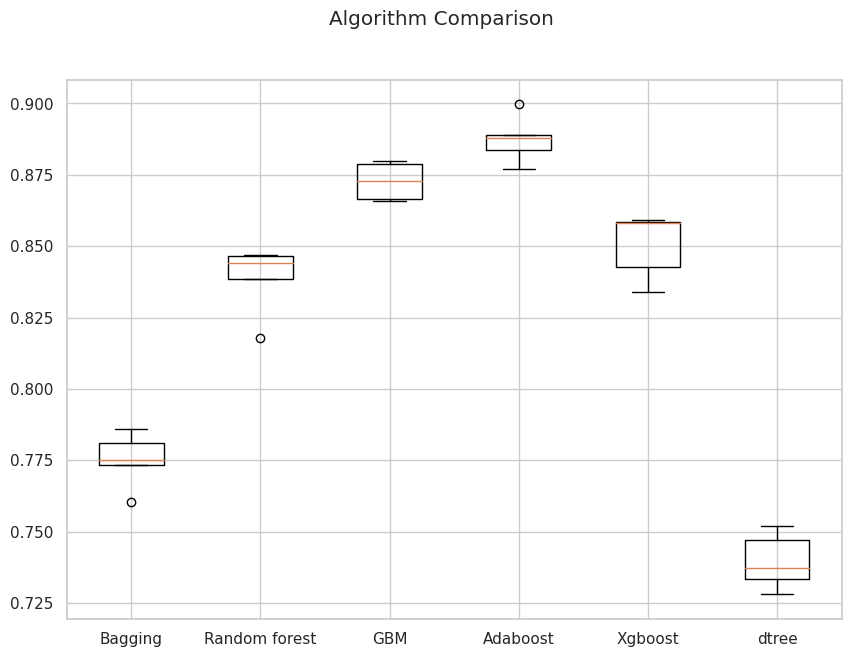

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**

1. **AdaBoost** achieved the highest recall on both training (0.8874) and validation (0.8833), making it the most reliable for minimizing false negatives.

2. **GBM** followed closely with strong and consistent recall on training (0.8727) and validation (0.8746), showing stable generalization.

3. **XGBoost** performed slightly lower than GBM, with recall of 0.8504 (train) and 0.8494 (validation), still demonstrating robust recall.

4. **Random Forest** offered moderately high recall, scoring 0.8387 on training and 0.8289 on validation, making it a strong alternative.

5. **Bagging** performed reasonably on training (0.7751) and validation (0.7638), but was outperformed by ensemble boosting methods.

6. **Decision Tree** had the lowest recall (0.7395 train, 0.7414 val), indicating a tendency to underfit or misclassify more actual positives.

Overall, ensemble boosting methods (AdaBoost, GBM, XGBoost) outperformed bagging and standalone decision trees in identifying true positives.


### Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset with oversampled data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset with oversampled data:

Bagging: 0.7438098298435637
Random forest: 0.8191058057828453
GBM: 0.8592301753992826
Adaboost: 0.8623363504363578
Xgboost: 0.8440353638440211
dtree: 0.7188782986681831

Validation Performance:

Bagging: 0.7485851110143665
Random forest: 0.8186765346103614
GBM: 0.8528515454941228
Adaboost: 0.8561166739225076
Xgboost: 0.8410970831519373
dtree: 0.7248585111014366


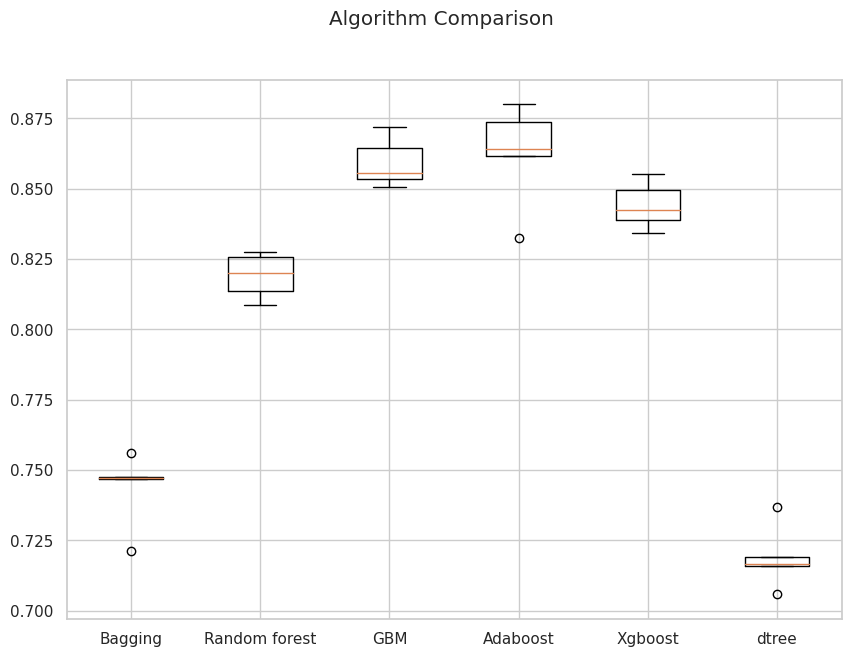

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**

1. **AdaBoost** maintained the highest validation recall (0.8561), slightly improving generalization with oversampled training data.

2. **GBM** closely followed with validation recall of 0.8529, showing it benefits moderately from oversampling.

3. **Random Forest** had strong recall (0.8191 train, 0.8187 val), consistent with its robust handling of larger datasets.

4. **XGBoost** delivered solid performance (0.8440 train, 0.8411 val), though slightly lower than AdaBoost and GBM.

5. **Bagging** showed lower recall (0.7486 val), indicating limited benefit from oversampling in capturing positive cases.

6. **Decision Tree** had the weakest recall (0.7249 val), showing limited improvement even after oversampling.

Overall, AdaBoost and GBM remained top performers, confirming their effectiveness even when the data distribution is balanced using SMOTE.

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss",n_jobs=-1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset with undersampled data:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset with undersampled data:

Bagging: 0.6040899760520013
Random forest: 0.6831018360132285
GBM: 0.7187274774774776
Adaboost: 0.7131575721290911
Xgboost: 0.6966116432888584
dtree: 0.6177627152468925

Validation Performance:

Bagging: 0.6055724858511101
Random forest: 0.6702220287331302
GBM: 0.7085328689595124
Adaboost: 0.7085328689595124
Xgboost: 0.6852416195037004
dtree: 0.6216804527644754


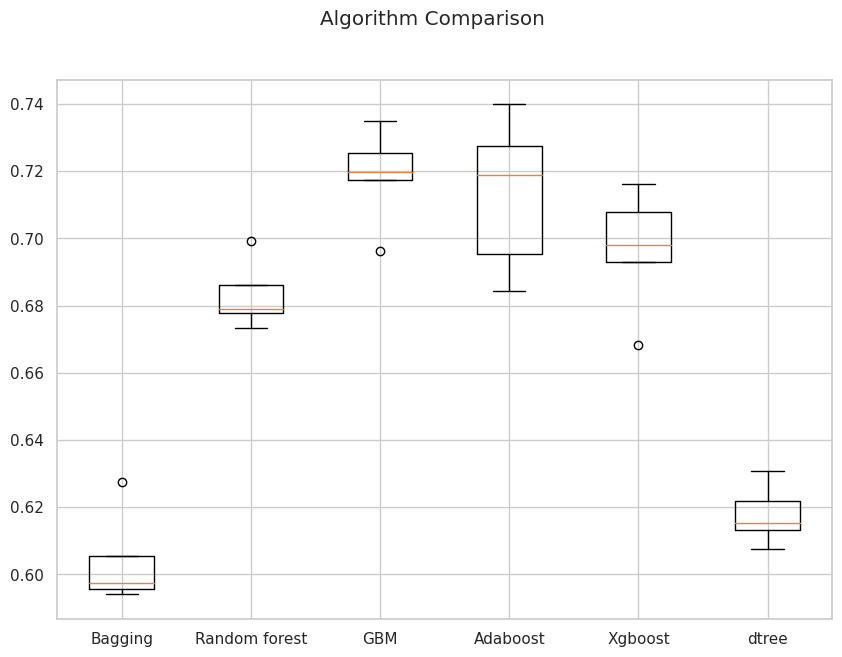

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations**

1. **GBM** achieved the highest validation recall (0.7085) among all models, showing it can still learn well from reduced data.

2. **AdaBoost** matched GBM on validation recall (0.7085), but slightly underperformed during training (0.7132 vs GBM’s 0.7187).

3. **XGBoost** showed moderate recall (0.6966 train, 0.6852 val), performing better than Bagging and Decision Trees.

4. **Random Forest** had a noticeable drop (0.6702 val), indicating it struggles more with reduced data volume.

5. **Bagging** performed poorly (0.6056 val), showing it's less effective under data constraints.

6. **Decision Tree** had the lowest overall recall (0.6178 train, 0.6217 val), highlighting underfitting in undersampled conditions.

Overall, while GBM and AdaBoost remained top performers, undersampling led to reduced recall across all models, confirming the cost of losing valuable positive class data.


### Selecting final models for hyperparameter tuning

The models selected for hyperparameter tuning are -

1. **AdaBoost** consistently delivers the highest recall, especially on original data — best at minimizing false negatives.

2. **GBM** is a very close second with excellent consistency across all datasets.

3. **XGBoost** is stable but slightly behind AdaBoost and GBM in recall.


## Hyperparameter Tuning

### 1. Tuning Gradient Boost with original data

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)## Fit the original model

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05} with CV score=0.8844126444205086:
CPU times: user 2.11 s, sys: 142 ms, total: 2.26 s
Wall time: 59.5 s


In [ ]:
tuned_gbm_orig = GradientBoostingClassifier(
    n_estimators=125,
    learning_rate=0.05,
    subsample=0.7,
    max_features=0.7,
    random_state=1
)

tuned_gbm_orig.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
gbm_train_perf_orig = model_performance_classification_sklearn(
    tuned_gbm_orig, X_train, y_train
)
gbm_train_perf_orig

,Accuracy,Recall,Precision,F1
0,0.755,0.881,0.781,0.828


In [ ]:
gbm_val_perf_orig = model_performance_classification_sklearn(
    tuned_gbm_orig, X_val, y_val
)
gbm_val_perf_orig

,Accuracy,Recall,Precision,F1
0,0.742,0.873,0.771,0.819


### 2. Tuning Adaboost with original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9362042497356555:
CPU times: user 1.9 s, sys: 182 ms, total: 2.08 s
Wall time: 1min 42s


In [ ]:
# Creating new pipeline with best parameters
tuned_ada_org = AdaBoostClassifier(
    n_estimators= 100,
    learning_rate= 0.05,
    estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_ada_org.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=100)

In [ ]:
ada_train_perf_org = model_performance_classification_sklearn(tuned_ada_org, X_train, y_train)
ada_train_perf_org

,Accuracy,Recall,Precision,F1
0,0.733,0.910,0.746,0.820


In [ ]:
ada_val_perf_org = model_performance_classification_sklearn(tuned_ada_org, X_val, y_val)
ada_val_perf_org

,Accuracy,Recall,Precision,F1
0,0.723,0.908,0.738,0.814


### 3. Tuning with XGBoost with original data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)## Fit the original model

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9958029042127047:
CPU times: user 1.83 s, sys: 189 ms, total: 2.02 s
Wall time: 40.2 s


In [ ]:
tuned_xgb_orig = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)

tuned_xgb_orig.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train_perf_orig = model_performance_classification_sklearn(
    tuned_xgb_orig, X_train, y_train
)
xgb_train_perf_orig

,Accuracy,Recall,Precision,F1
0,0.780,1.000,0.752,0.859


In [ ]:
xgb_val_perf_orig = model_performance_classification_sklearn(tuned_xgb_orig, X_val, y_val)
xgb_val_perf_orig

,Accuracy,Recall,Precision,F1
0,0.699,0.967,0.699,0.811


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf_orig.T,
        ada_train_perf_org.T,
        xgb_train_perf_orig.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with original data",
    "Adaboost tuned with original data",
    "XGBoost tuned with original data",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Gradient Boosting tuned with original data,0.755,0.881,0.781,0.828
Adaboost tuned with original data,0.733,0.910,0.746,0.820
XGBoost tuned with original data,0.780,1.000,0.752,0.859


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf_orig.T,
        ada_val_perf_org.T,
        xgb_val_perf_orig.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with original data",
    "Adaboost tuned with original data",
    "XGBoost tuned with original data",
]
print("Validation performance comparison:")
models_val_comp_df.T

Validation performance comparison:


,Accuracy,Recall,Precision,F1
Gradient Boosting tuned with original data,0.742,0.873,0.771,0.819
Adaboost tuned with original data,0.723,0.908,0.738,0.814
XGBoost tuned with original data,0.699,0.967,0.699,0.811


**Observations**

**Final Model : XGBoost**
1. **Highest Recall (0.967)**
→ Critical metric for EasyVisa, where the goal is to avoid denying qualified visa applicants. XGBoost correctly identifies 96.7% of all actual Certified cases.
2. Ensures almost no eligible applicant is rejected, aligning with EasyVisa’s mission of fair and inclusive approval processes.
3.  Despite lower precision, the F1 score remains strong, indicating a solid balance between identifying true positives and avoiding false positives.
4. Accuracy (0.699) is lower because of class imbalance and the model's bias toward capturing positives — which is intentional and strategic in this use case.

## Performance of Final Model on Test Data

In [ ]:
# Let's check the performance on test set
xgb_test = model_performance_classification_sklearn(tuned_xgb_orig, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.714,0.975,0.707,0.820


**Observations**

1. **XGBoost** achieved a recall of 0.975, meaning it correctly identified 97.5% of all truly eligible visa applicants, perfectly aligning with EasyVisa’s goal to minimize false negatives.
2. Precision is 0.707, indicating that about 29.3% of applicants predicted as "Certified" may actually be unqualified, which is a manageable trade-off in favor of high recall.
3. F1 Score of 0.820 shows a strong balance between precision and recall, confirming that the model performs reliably across both metrics.
4. Accuracy of 0.714 suggests that overall, 71.4% of all predictions (both Certified and Denied) are correct, a decent result given the model’s bias toward capturing all positives.

5. The high recall ensures no deserving applicant is wrongly denied, which is crucial in a high-stakes immigration context like visa certification.

**Finally, XGBoost is the chosen model because it maximizes the organization’s core objective — approving every genuinely qualified applicant without missing anyone.**

## Feature Importances

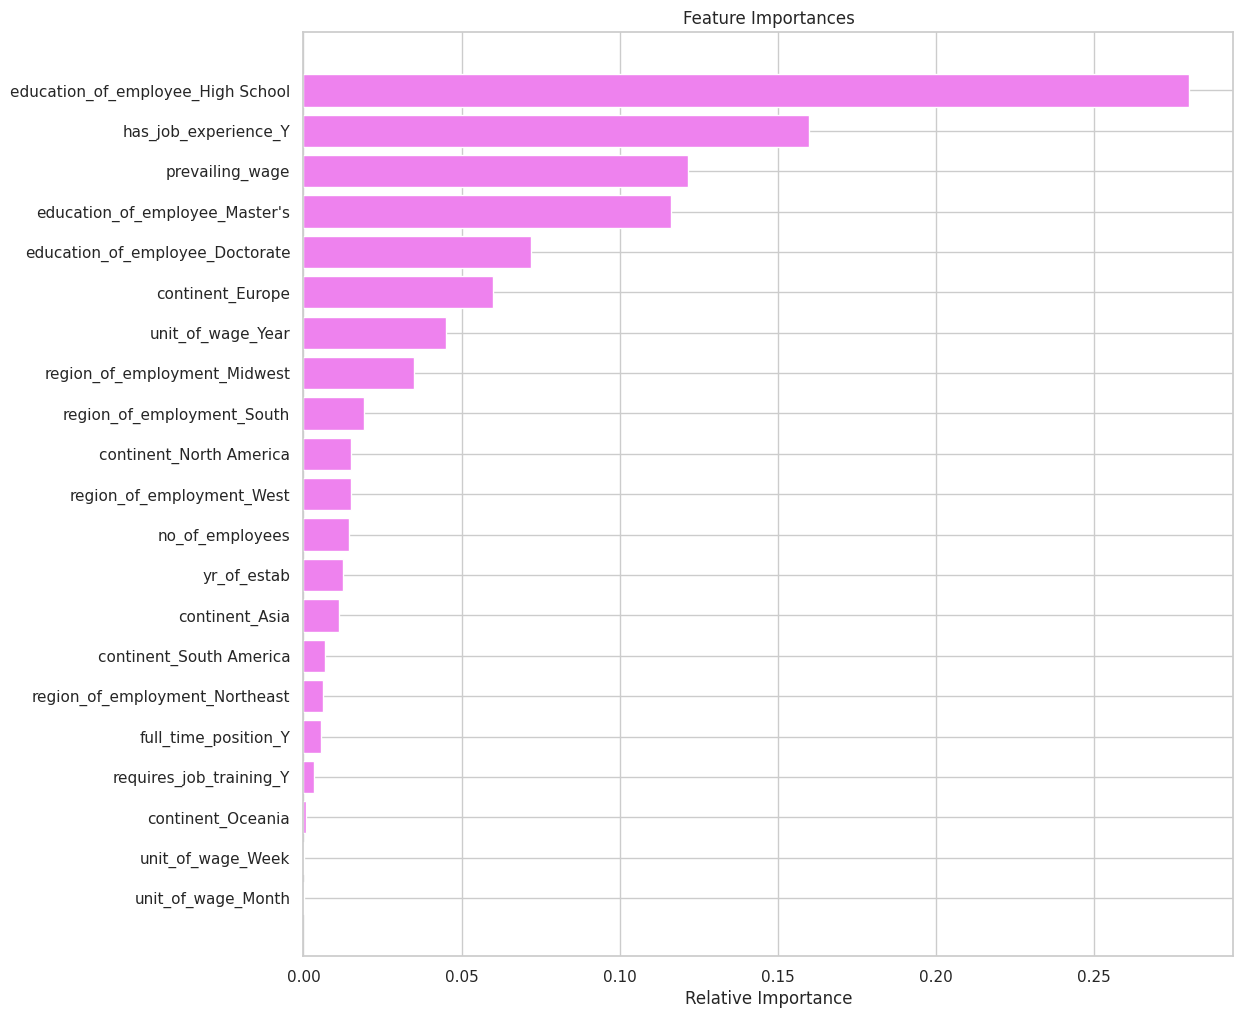

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm_orig.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Insights**

1. **Education_of_employee_High School**

  Applicants with only high school education are highly influential in visa decisions. These cases may be more likely to be denied or require additional scrutiny.
  Enhancing the documentation review or screening for lower-educated applicants and  offer skill-bridging programs.

2. **Has_job_experience**

  Prior job experience is strongly predictive of visa approval. Candidates with work experience are more trusted for employment-based visas.
  
  Recommendation: Prioritize experienced applicants; possibly streamline or fast-track their processing.

3. **Normalized_wage**

  Higher wages correlate with greater approval likelihood. Wage levels signal job legitimacy and candidate value.

  Recommendation: Flag low-wage applications for review; educate employers on prevailing wage thresholds.

4. **Education_of_employee_Master's and Doctorate**
Higher education improves approval odds but is less critical than job experience. Educational attainment is valued, but not a standalone predictor.

  Recommendation: Position high-education applicants in specialized or research-based roles for stronger success rates.



5. **Continent_Asia**
Continental origin plays a role; Asia is prominent. Large volumes of applications and possible policy scrutiny influence this signal.

  Recommendation: Encourage employer sponsorship in these regions; assess policy alignment with regional trends.

6. **Region_of_employment_West and Northeast**

  The region of job placement impacts approval likelihood. Western and Northeastern US regions may have favorable labor market conditions or visa policies.

7. **Requires_job_training**

  Training requirement reduces chances of approval. Employers needing to train foreign workers face a higher bar.
  Recommendation: Offer pre-arrival skill certifications or training partnerships to mitigate this effect.

## Actionable Insights and Recommendations

1. **Profiles Strongly Recommended for Visa Certification:**
  * **Education Level**: Applicants with a Bachelor’s, Master’s, or Doctorate degree show significantly higher chances of approval.

  * **Prevailing Wage:** Candidates earning a median wage of $72,000 or more per annum are strongly favored for certification.

  * **Work Experience:** Prior relevant job experience is a key factor positively influencing visa approval.

2. **Additional Supporting Factors:**

  * **Continent of Origin:** Applicants from Europe and Africa tend to have higher approval rates.

  * **Region of Employment:** Roles based in the Midwest and South regions of the U.S. are more likely to be certified.

  * **Wage Payment Frequency:** Salaries paid on a Yearly, Monthly, or Weekly basis are associated with higher chances of visa approval.

3. **Profiles Likely to Face Visa Denial:**
  * **Education Level:** Applicants whose highest qualification is High School are more prone to denial.

  * **Prevailing Wage:** A median annual wage of $65,000 or below is commonly observed among denied applications.

  * **Work Experience:** Lack of prior job experience significantly reduces the likelihood of certification.

4. **Additional Risk Indicators:**

  * **Continent of Origin**: Candidates from South America and North America show higher denial trends.

  * **Region of Employment:** Positions located in Island territories or the Western U.S. region are more frequently denied.

  * **Wage Payment Frequency**: Applicants paid on an Hourly basis are less likely to be certified.

5. **Factors with Minimal Influence on Visa Outcomes:**
  * Whether the applicant requires job training.

  * Whether the position is full-time or part-time.

  * The number of employees in the sponsoring organization.

  * The year the employer was established.